In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../footfall_735.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,DATE,day,month,bogo,paneer,guest,test,meal_type,footfall,max_possible_footfall
0,0,0,2023-07-29,Saturday,July,0,0,0,0,Dinner,48,89
1,1,1,2023-08-21,Monday,August,0,0,1,0,Breakfast,307,325
2,2,2,2023-05-16,Tuesday,May,0,0,0,0,Dinner,181,225
3,3,3,2023-06-08,Thursday,June,0,0,0,0,Dinner,80,120
4,4,4,2023-08-07,Monday,August,0,0,0,0,Dinner,52,100


In [3]:
# dropping Unnamed: 0 column
data.drop('Unnamed: 0.1', axis=1, inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,DATE,day,month,bogo,paneer,guest,test,meal_type,footfall,max_possible_footfall
0,2023-07-29,Saturday,July,0,0,0,0,Dinner,48,89
1,2023-08-21,Monday,August,0,0,1,0,Breakfast,307,325
2,2023-05-16,Tuesday,May,0,0,0,0,Dinner,181,225
3,2023-06-08,Thursday,June,0,0,0,0,Dinner,80,120
4,2023-08-07,Monday,August,0,0,0,0,Dinner,52,100


In [4]:
data['date'] = pd.to_datetime(data['DATE'])
data.head()

,DATE,day,month,bogo,paneer,guest,test,meal_type,footfall,max_possible_footfall,date
0,2023-07-29,Saturday,July,0,0,0,0,Dinner,48,89,2023-07-29
1,2023-08-21,Monday,August,0,0,1,0,Breakfast,307,325,2023-08-21
2,2023-05-16,Tuesday,May,0,0,0,0,Dinner,181,225,2023-05-16
3,2023-06-08,Thursday,June,0,0,0,0,Dinner,80,120,2023-06-08
4,2023-08-07,Monday,August,0,0,0,0,Dinner,52,100,2023-08-07


In [5]:
data.drop('DATE', axis=1, inplace=True)

In [6]:
data2 = data.drop('month', axis=1)

In [7]:
# one hot encoding for day of week
data2 = pd.get_dummies(data, columns=['day'])
# one hot encoding for meal_type 
data2 = pd.get_dummies(data2, columns=['meal_type'])

In [8]:
data2.head()

,month,bogo,paneer,guest,test,footfall,max_possible_footfall,date,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,meal_type_Breakfast,meal_type_Dinner,meal_type_Lunch,meal_type_Snacks
0,July,0,0,0,0,48,89,2023-07-29,False,False,True,False,False,False,False,False,True,False,False
1,August,0,0,1,0,307,325,2023-08-21,False,True,False,False,False,False,False,True,False,False,False
2,May,0,0,0,0,181,225,2023-05-16,False,False,False,False,False,True,False,False,True,False,False
3,June,0,0,0,0,80,120,2023-06-08,False,False,False,False,True,False,False,False,True,False,False
4,August,0,0,0,0,52,100,2023-08-07,False,True,False,False,False,False,False,False,True,False,False


In [9]:
data3 = data2.drop('date', axis=1)

In [10]:
data3 = data3.drop('month', axis=1)

In [11]:
# predicting footfall for the days of the week
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [12]:
# splitting the data into train and test
X = data3.drop('footfall', axis=1)
y = data3['footfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
# training the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# predicting the test data
predictions = lm.predict(X_test)

# calculating the mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error: ', mse)

# calculating the mean absolute error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  3643.2735765966127
Mean Absolute Error:  48.00490439398303


In [15]:
# calculating the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  60.359535920984456


In [16]:
lm.coef_

array([ -53.26518769,   28.53632891, -111.19628697,  -21.52789586,
          0.75627373,   27.82078382,   18.84292871,  -24.23064712,
        -39.94388102,   -1.94183292,   -6.5301463 ,   25.98279484,
        -11.01098376,   13.94547876,    9.13962608,  -12.07412109])

In [17]:
# getting the coefficients of the model
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
bogo,-53.265188
paneer,28.536329
guest,-111.196287
test,-21.527896
max_possible_footfall,0.756274
day_Friday,27.820784
day_Monday,18.842929
day_Saturday,-24.230647
day_Sunday,-39.943881
day_Thursday,-1.941833


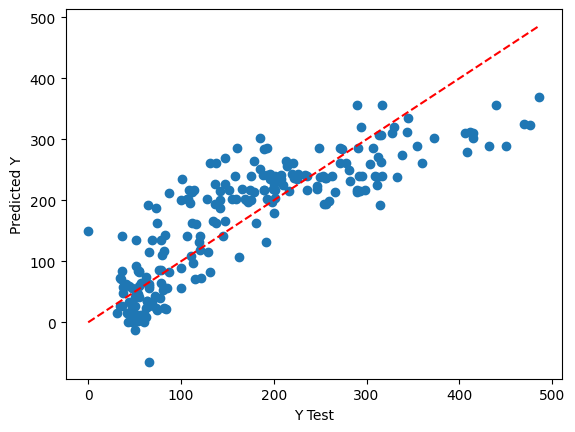

In [18]:
# plotting the regression line for the model
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

C:\Users\Alli Ajagbe\AppData\Local\Temp\ipykernel_13748\232137980.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=50)


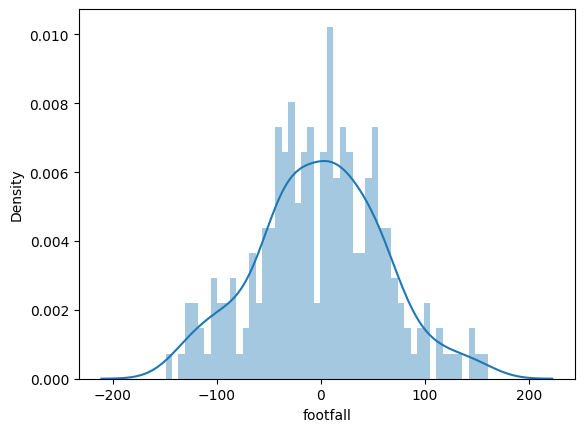

In [19]:
# plotting the residuals
sns.distplot((y_test - predictions), bins=50)
plt.show()

In [20]:
%pip install statsmodels

In [21]:
# using a poisson regression model
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [22]:
# creating the poissson regression model

model = glm(formula='footfall ~ day_Monday + day_Tuesday + day_Wednesday + bogo + paneer + day_Thursday + day_Friday + guest + test + day_Saturday + max_possible_footfall + day_Sunday + meal_type_Breakfast + meal_type_Dinner + meal_type_Lunch', data=data3, family=sm.families.Poisson()).fit()

# printing the summary of the model
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               footfall   No. Observations:                  736
Model:                            GLM   Df Residuals:                      721
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10555.
Date:                Thu, 14 Dec 2023   Deviance:                       16243.
Time:                        18:26:05   Pearson chi2:                 1.38e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [23]:
# printing the mean squared error
mse = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error: ', mse)

# printing the mean absolute error
mae = mean_absolute_error(y_test, model.predict(X_test))
print('Mean Absolute Error: ', mae)

Mean Squared Error:  2708.7489410394046
Mean Absolute Error:  38.452055538922664


In [24]:
print('Root Mean Squared Error: ', np.sqrt(mse))

Root Mean Squared Error:  52.04564286315815


In [40]:
# changing the data type of the columns to bool
data3['bogo'] = data3['bogo'].astype('bool')
data3['paneer'] = data3['paneer'].astype('bool')
data3['guest'] = data3['guest'].astype('bool')
data3['test'] = data3['test'].astype('bool')
data3['meal_type_Breakfast'] = data3['meal_type_Breakfast'].astype('bool')
data3['meal_type_Dinner'] = data3['meal_type_Dinner'].astype('bool')
data3['meal_type_Lunch'] = data3['meal_type_Lunch'].astype('bool')

In [41]:
model2 = glm(formula='footfall ~ bogo + paneer + day_Sunday + day_Saturday + guest + test + max_possible_footfall + meal_type_Breakfast + meal_type_Dinner + meal_type_Lunch', data=data3, family=sm.families.Poisson()).fit()

print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               footfall   No. Observations:                  736
Model:                            GLM   Df Residuals:                      725
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10593.
Date:                Thu, 14 Dec 2023   Deviance:                       16319.
Time:                        20:35:06   Pearson chi2:                 1.39e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [42]:
# printing the mean squared error
mse2 = mean_squared_error(y_test, model2.predict(X_test))
print('Mean Squared Error: ', mse2)

# printing the mean absolute error
mae2 = mean_absolute_error(y_test, model2.predict(X_test))
print('Mean Absolute Error: ', mae2)

Mean Squared Error:  2636.3094886864856
Mean Absolute Error:  38.069626073756616


In [27]:
print('Root Mean Squared Error: ', np.sqrt(mse))

Root Mean Squared Error:  52.04564286315815


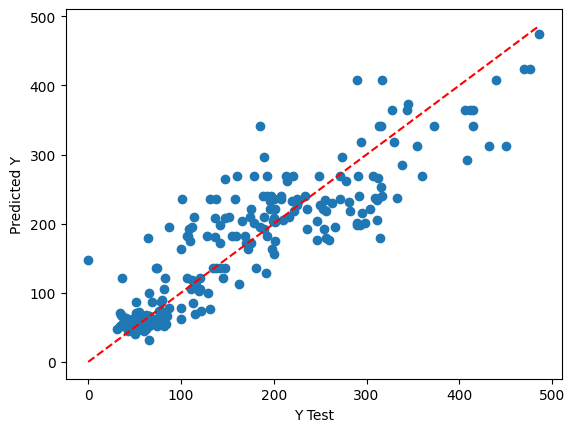

In [28]:
# using the coefficients of the model to plot the regression line
predictions = model2.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

C:\Users\Alli Ajagbe\AppData\Local\Temp\ipykernel_13748\232137980.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=50)


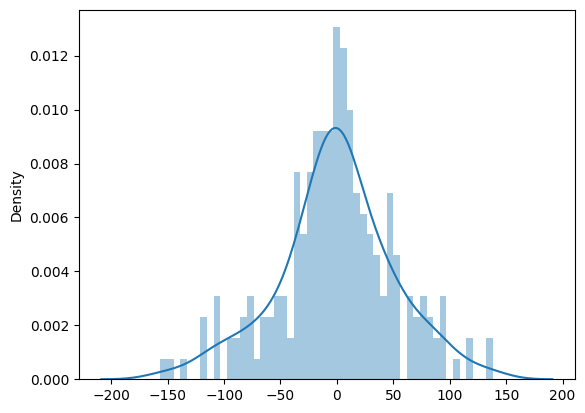

In [29]:
# plotting the residuals
sns.distplot((y_test - predictions), bins=50)
plt.show()

In [30]:
# getting the days where the predicted footfall was off by more than 38
data3['predicted_footfall'] = model2.predict(X)
data3['difference'] = data3['predicted_footfall'] - data3['footfall']
data3['difference'] = data3['difference'].abs()
data3[data3['difference'] < 38]

,bogo,paneer,guest,test,footfall,max_possible_footfall,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,meal_type_Breakfast,meal_type_Dinner,meal_type_Lunch,meal_type_Snacks,predicted_footfall,difference
0,0,0,0,0,48,89,False,False,True,False,False,False,False,False,True,False,False,57.549715,9.549715
3,0,0,0,0,80,120,False,False,False,False,True,False,False,False,True,False,False,78.144093,1.855907
4,0,0,0,0,52,100,False,True,False,False,False,False,False,False,True,False,False,70.338732,18.338732
5,1,0,0,0,58,70,False,False,False,False,False,False,True,True,False,False,False,46.947277,11.052723
6,0,0,0,0,37,124,False,False,False,True,False,False,False,False,False,True,False,56.693360,19.693360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1,0,0,0,179,355,True,False,False,False,False,False,False,True,False,False,False,210.309318,31.309318
730,0,0,0,0,377,417,False,False,False,False,True,False,False,False,False,True,False,341.330314,35.669686
731,1,0,0,0,196,355,False,False,False,False,False,False,True,True,False,False,False,210.309318,14.309318
732,0,0,0,0,129,225,False,False,False,False,False,True,False,False,True,False,False,135.778082,6.778082


In [31]:
(len(data3[data3['difference'] < 38]) / len(data3)) * 100

61.95652173913043

In [32]:
# getting the impact of the variables on the footfall
coefficients = pd.DataFrame(model2.params, X.columns)
coefficients.columns = ['Coefficients']

In [43]:
# saving the model to a pickle file
import joblib
joblib.dump(model2, 'poissonreg.pkl')

['poissonreg.pkl']

In [44]:
# printing the datatypes of the columns
data3.dtypes

bogo                        bool
paneer                      bool
guest                       bool
test                        bool
footfall                   int64
max_possible_footfall      int64
day_Friday                  bool
day_Monday                  bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
meal_type_Breakfast         bool
meal_type_Dinner            bool
meal_type_Lunch             bool
meal_type_Snacks            bool
predicted_footfall       float64
difference               float64
dtype: object

In [46]:
# mean mae for the model
abs(data3['difference']).mean()

41.39607491793259